**Import the** **libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

**Read the Dataset**

In [18]:
from google.colab import files 
uploaded = files.upload()
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1') 
df.head()


Saving spam.csv to spam (2).csv


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Preprocessing the Dataset**

In [19]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

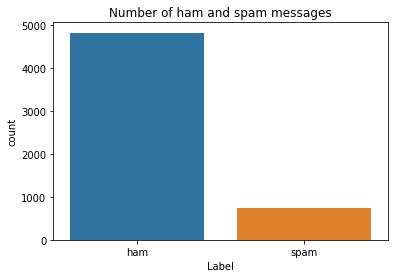

In [20]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [21]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [23]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

**Create the model**

In [24]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

**Add Layers(LSTM ,Dense-(Hidden Layers), Output and Compile the model**

In [25]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

**Train and fit the model**

In [26]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 16s 288ms/step - loss: 0.3461 - accuracy: 0.8633 - val_loss: 0.1398 - val_accuracy: 0.9694
Epoch 2/10
30/30 [==============================] - 8s 264ms/step - loss: 0.0946 - accuracy: 0.9762 - val_loss: 0.0529 - val_accuracy: 0.9821
Epoch 3/10
30/30 [==============================] - 8s 265ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0432 - val_accuracy: 0.9873
Epoch 4/10
30/30 [==============================] - 8s 266ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0429 - val_accuracy: 0.9884
Epoch 5/10
30/30 [==============================] - 8s 262ms/step - loss: 0.0259 - accuracy: 0.9929 - val_loss: 0.0456 - val_accuracy: 0.9873
Epoch 6/10
30/30 [==============================] - 8s 273ms/step - loss: 0.0193 - accuracy: 0.9942 - val_loss: 0.0554 - val_accuracy: 0.9873
Epoch 7/10
30/30 [==============================] - 8s 267ms/step - loss: 0.0145 - accuracy: 0.9960 - val_loss: 0.0628 - val_accuracy: 0.9852
Epoch

**Save the model**

In [27]:
model.save('sms_classifier.h5')

**Preprocessing the test dataset**

In [28]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

**Test the model**

In [29]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 23ms/step - loss: 0.0801 - accuracy: 0.9892


In [30]:
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
 Loss: 0.080
 Accuracy: 0.989
